In [1]:
from utils_review import *

## Julian Lewis phase model

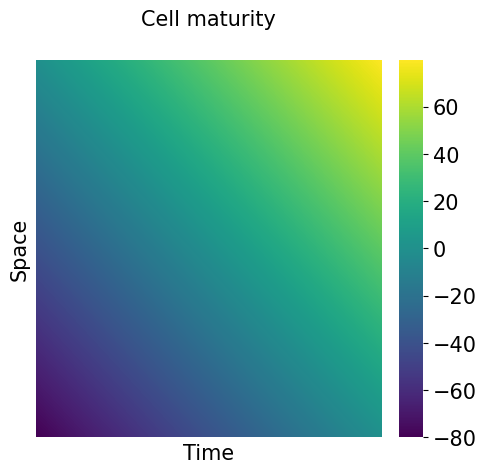

In [2]:
L = 80.
x = np.arange(-L, 0., .1)
t = np.arange(0., L, .1)
tt, xx = np.meshgrid(t, x, indexing='xy')
plot_kymo(xx+tt, 'Cell maturity', colorbar=True)


$ \dot \theta = r(m(x,t)) $


In [3]:
def r(m, sigma=1.):
    return (1. - np.tanh(m/sigma))/2.

def theta_dot(t, theta, x, sigma=1.):
    m = x + t 
    return r(m, sigma)

def analytic_solution(x,t, sigma=1.):
    return 1./2.*(t + sigma*np.log( (np.exp(x/sigma) + np.exp(-x/sigma)) / (np.exp((x+t)/sigma) + np.exp(-(x+t)/sigma)) ))

def asymptotic_solution(x,t, sigma=1.):
    return 1./2.*(t - x - sigma*np.log( (np.exp((x+t)/sigma) + np.exp(-(x+t)/sigma)) ))

def asymptotic_solution_m(m,t, sigma=1.):
    return t - m/2. - sigma/2.*np.log( (np.exp(m/sigma) + np.exp(-m/sigma)) )


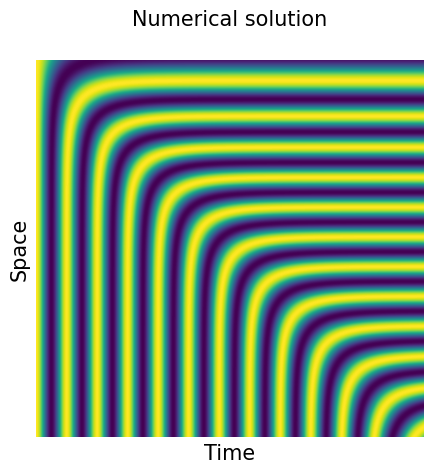

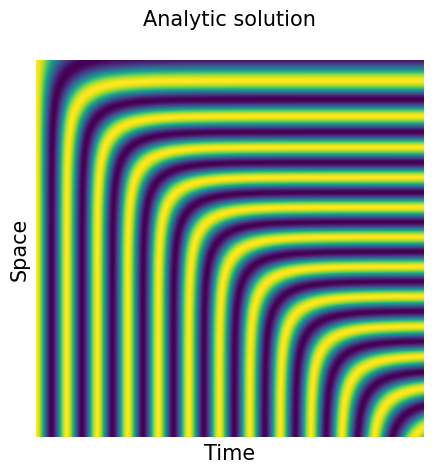

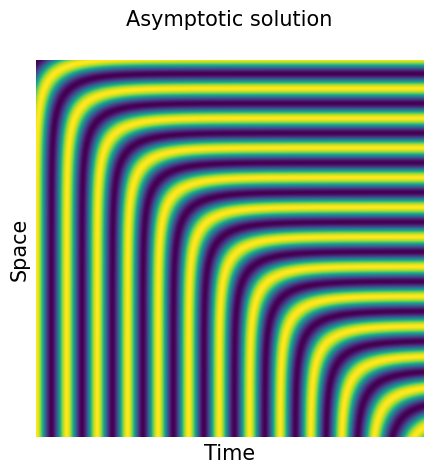

In [4]:
sigma = 10.
theta0 = np.zeros(len(x))

theta = np.zeros((len(x), len(t)))
for cell, x_loc in enumerate(x):
    theta[cell, :] = integrate(theta_dot, (np.min(t), np.max(t)), (theta0[cell],), method='LSODA', t_eval=t, args=(x_loc, sigma), rtol=1e-5).y

plot_kymo(np.cos(theta), 'Numerical solution')
plot_kymo(np.cos(analytic_solution(xx, tt, sigma)), 'Analytic solution')
plot_kymo(np.cos(asymptotic_solution(xx, tt, sigma)), 'Asymptotic solution')

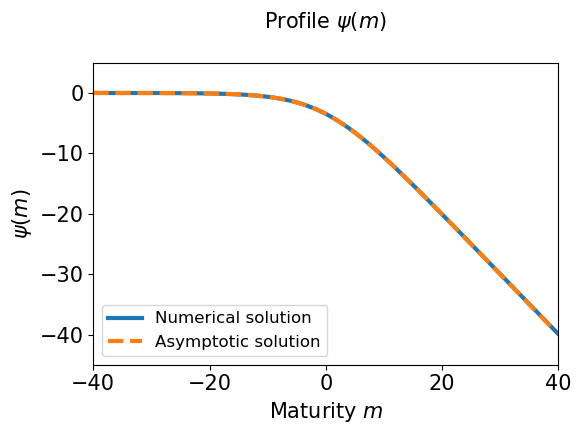

In [5]:
m = np.arange(-L/2, L/2, 1.)
plt.plot(x+t, theta[np.arange(len(x)),np.arange(len(t))]-t, label='Numerical solution')
plt.plot(m, asymptotic_solution(m, 0., 10.), '--', label='Asymptotic solution')
plt.xlim([-L/2, L/2])
plt.ylim([-45., 5.])
plt.title(r'Profile $\psi(m)$')
plt.xlabel(r'Maturity $m$')
plt.ylabel(r'$\psi(m)$')
# plt.xticks((-L/2, 0., L/2), ('-L/2', '0', 'L/2'))
# plt.yticks((-L/2, 0.), ('-L/2', '0'))
plt.legend()
plt.show()

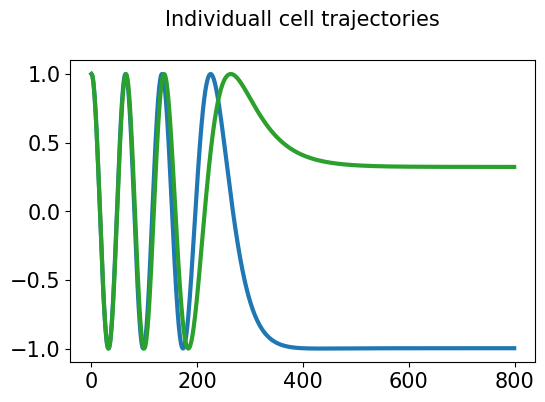

In [6]:
# plt.plot(np.cos(theta[-150, :]))
plt.plot(np.cos(theta[-220, :]))
plt.plot(np.cos(theta[-200, :]), c ='tab:green')
plt.title('Individuall cell trajectories')
plt.show()

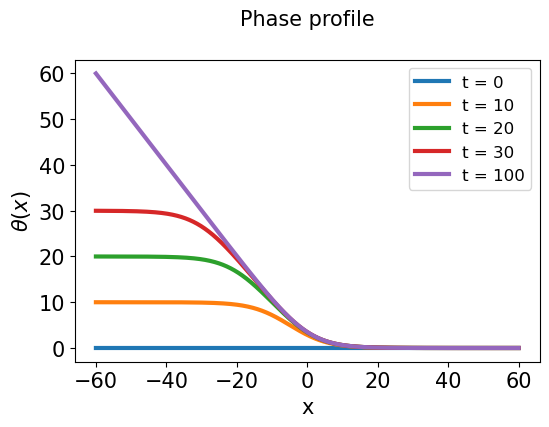

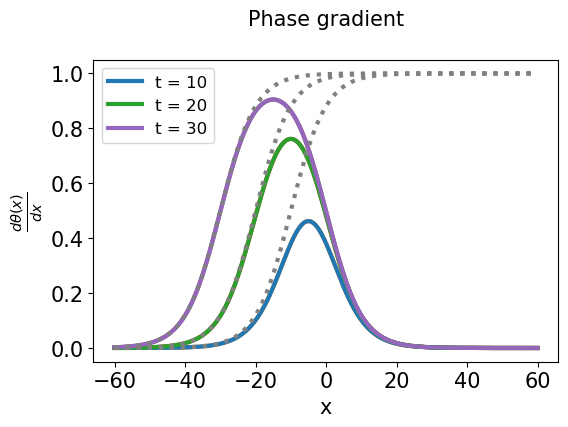

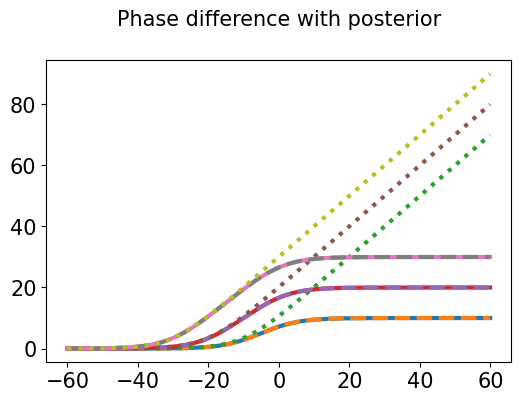

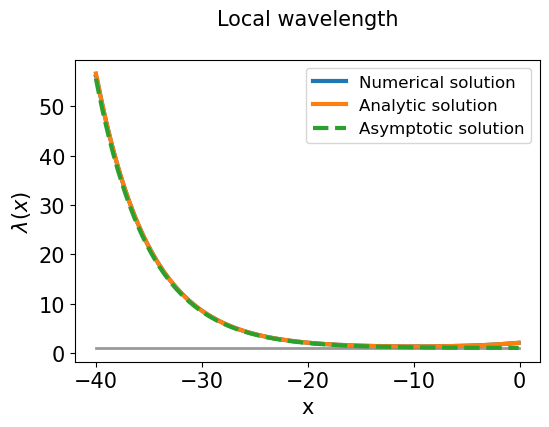

In [7]:
dx = 0.1
sigma = 10.
x1 = np.arange(-60, 60, dx)
t1 = np.array((0., 10., 20., 30., 100.))

for time in t1:
    theta1 = analytic_solution(x1, time, sigma)
    plt.plot(x1, theta1, lw = 3, label='t = '+str(int(time)))
plt.title(r'Phase profile')
plt.xlabel('x')
plt.ylabel(r'$\theta(x)$')
plt.legend()
plt.show()
t1 = np.array((10., 20., 30.))
for time in t1:
    theta1 = analytic_solution(x1, time, sigma)
    plt.plot(x1, 0.5*np.abs(np.tanh((x1 + time)/sigma) - np.tanh(x1/sigma)), label='t = '+str(int(time)), zorder=2)
    plt.plot(x1, 1./dx*np.abs(np.gradient(theta1)), zorder=1)
for time in t1:
    plt.plot(x1, 0.5*np.abs(np.tanh((x1 + time)/sigma) + 1.), ':', c='grey')
plt.title('Phase gradient')
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\frac{d \theta(x)}{d x}$')
plt.show()

for time in t1:
    theta1 = analytic_solution(x1, time, sigma)
    plt.plot(x1, dx*np.cumsum(1./dx*np.abs(np.gradient(theta1))))
    plt.plot(x1, dx*np.cumsum(0.5*np.abs(np.tanh((x1 + time)/sigma) - np.tanh(x1/sigma))), '--')
    plt.plot(x1, dx*np.cumsum(0.5*np.abs(np.tanh((x1 + time)/sigma) + 1.)), ':')
plt.title('Phase difference with posterior')
plt.show()


x1 = np.arange(-40, -0, dx)
time = 20
theta1 = analytic_solution(x1, time, sigma)
plt.plot(x1, dx/np.abs(np.gradient(theta1)), lw = 3, label='Numerical solution')
plt.plot(x1, 2./np.abs(np.tanh((x1 + time)/sigma) - np.tanh(x1/sigma)), '-', label='Analytic solution')
plt.plot(x1, 2./np.abs(np.tanh((x1 + time)/sigma) + 1.), '--', label='Asymptotic solution')
plt.plot(x1, np.ones(len(x1)), '-', c='k', alpha=.4, lw=2, zorder=1)
plt.title('Local wavelength')
plt.xlabel('x')
plt.ylabel(r'$\lambda(x)$')
plt.legend()
plt.show()

## Delayed models : period computation

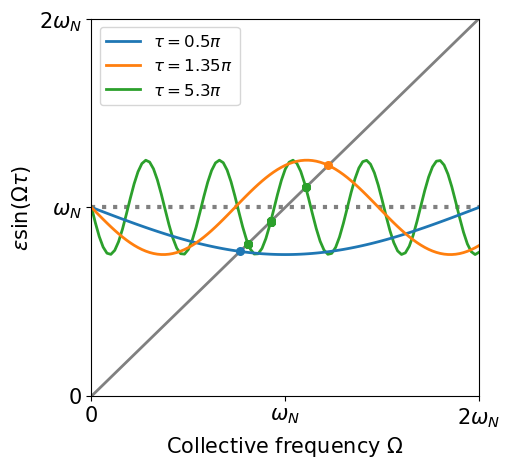

In [8]:
def iterative_root(f, x0, *pars):
    x = x0
    tol = 1e-4
    while np.abs(x - f(x, *pars)) > tol:
        x = f(x, *pars)
    return x

def transc_rhs(omega, omegaN, epsilon, tau):
    return omegaN - epsilon*np.sin(omega*tau)


omega = np.linspace(0, 2, 101)
omegaN = 1.
epsilon = 0.25
tau_values = np.array((0.5, 1.35))*np.pi/omegaN


plt.figure(figsize=(5,5))
plt.plot(omega, np.ones(len(omega)), ':', c='grey', zorder=0)
plt.plot(omega, omega, c='grey', alpha=1, lw=2, zorder=0)
for tau in tau_values:
    plt.plot(omega, omegaN - epsilon*np.sin(omega*tau), lw=2, label = r'$\tau = $'+str(tau/np.pi)+r'$\pi$')
    root = iterative_root(transc_rhs, 0., omegaN, epsilon, tau)
    plt.scatter(root, transc_rhs(root, omegaN, epsilon, tau), s=30, marker='o', zorder=5)
plt.yticks((np.arange(0., 2.01, 0.5)))
plt.xlim((0., 2.))
plt.ylim((0., 2.))
plt.legend()
# plt.show()


tau_values = np.array((5.3,))*np.pi/omegaN
init_conds = np.linspace(0., 2., 20)
# plt.figure(figsize=(5,5))
# plt.plot(omega, np.ones(len(omega)), ':', c='k', alpha=0.5)
# plt.plot(omega, omega, c='k', alpha=0.5)
for tau in tau_values:
    plt.plot(omega, omegaN - epsilon*np.sin(omega*tau), label = r'$\tau = $'+str(tau/np.pi)+r'$\pi$', lw=2, zorder=1)
    roots = np.zeros(len(init_conds))
    for i in range(len(init_conds)):
        roots[i] = iterative_root(transc_rhs, init_conds[i], omegaN, epsilon, tau)
    plt.scatter(roots, transc_rhs(roots, omegaN, epsilon, tau), s=30, marker='o', zorder=3)
plt.yticks((np.arange(0., 2.01, 0.5)))
plt.legend()
plt.xlim((0., 2.))
plt.ylim((0., 2.))
plt.xticks((0., 1., 2.), ('0', r'$\omega_N$', r'2$\omega_N$'))
plt.yticks((0., 1., 2.), ('0', r'$\omega_N$', r'2$\omega_N$'))
plt.xlabel(r'Collective frequency $\Omega$')
plt.ylabel(r'$\epsilon \sin(\Omega \tau)$')
plt.show()


## Murray model

In [9]:
L = 120
dx = 1.
x = np.arange(-3*L/4., L/4., dx)
t = np.arange(0., 120., 1.)

In [10]:
def theta_dot(t, theta, omega, A, B, dx):
    bc = (0., np.sqrt(omega/B))
    return omega + A*diffusion(theta, dx, -np.array(bc)) - B*(np.gradient(theta, dx)**2)

(120, 120)


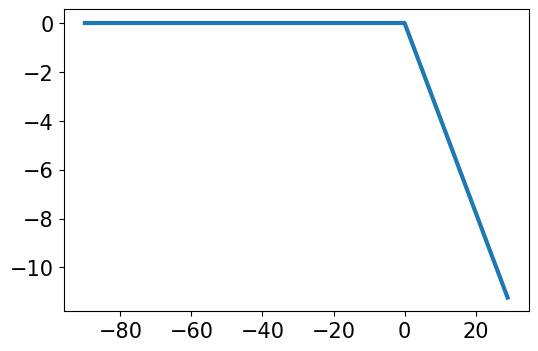

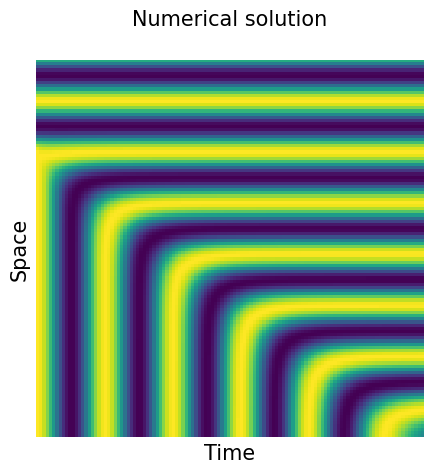

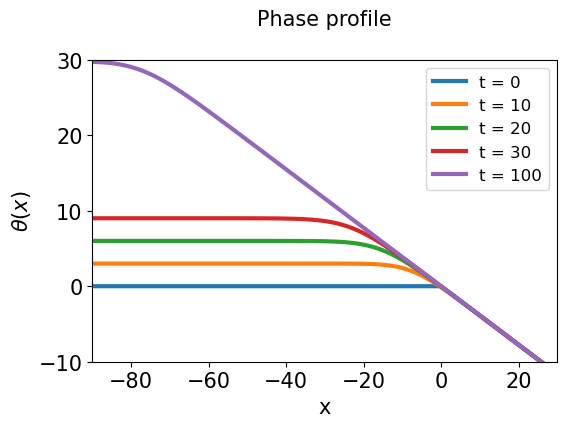

In [11]:
omega = .3
A = 4.
B = 2.


# theta0 = dx*np.cumsum(np.sqrt(omega/B)/(1+np.exp(np.sqrt(omega*B)*-x/A)))
theta0 = -x*np.sqrt(omega/B)
theta0[x<0] = theta0[x==0]

plt.plot(x, theta0)

theta = integrate(theta_dot, (np.min(t), np.max(t)), theta0, method='LSODA', t_eval=t, args=(omega, A, B, dx), rtol=1e-5).y
print(theta.shape)
plot_kymo(np.cos(theta), 'Numerical solution')


for time in (0, 10, 20, 30, 100):
    plt.plot(x, theta[:, time], label = 't = '+str(time))
plt.title(r'Phase profile')
plt.xlabel('x')
plt.ylabel(r'$\theta(x)$')
plt.xlim((-90., 30.))
plt.ylim((-10, 30.))
plt.legend()
plt.show()

## Phase Amplitude Model


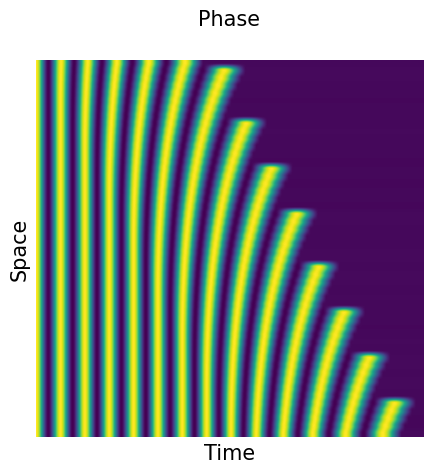

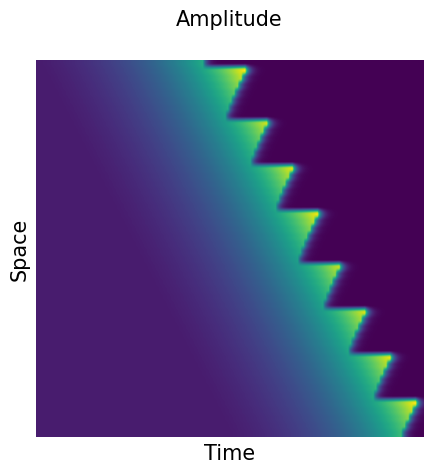

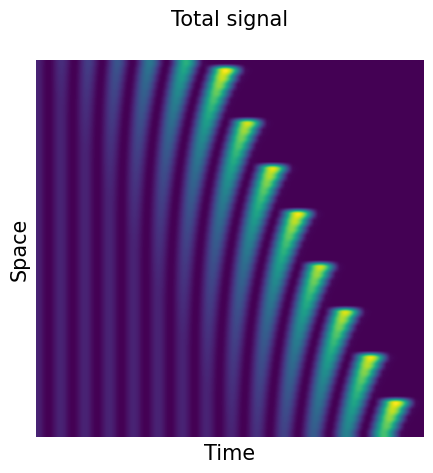

Text(0, 0.5, 'Concentration')

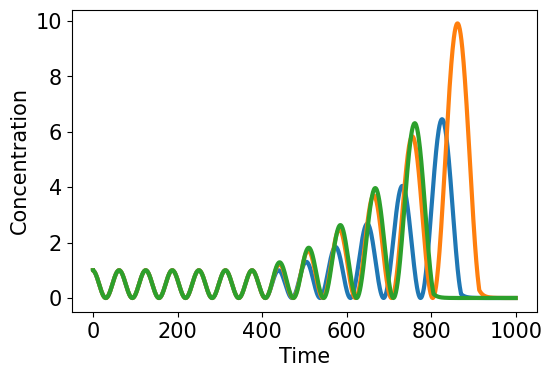

In [12]:
n_cells=50

def omega(x,t):
    #defines a moving frequency gradient from 1 to 0.5
    dom=1+0.01*((n_cells-x)-0.1*t)
    if (dom>1):
        dom=1
    if (dom<0.5):
        dom=0.5
    return dom

def dphase(ph,z,t):
    #d\phi/dt = omega, then if the  switch is 0 and the oscillation is in the through, phase stops
    dx = np.ones((n_cells,1))
    for i in range(n_cells):
        dx[i]=omega(i,t)
        if (z[i]==0) and (np.cos(ph[i])<-0.95):
            dx[i]=0
    return dx


def damp(ph,amp,z,t):
    # variation of amplitude : grows exponentially, then amplitude dies as soon as the last oscillation is performed
    dy = 0.0*amp
    for i in range(n_cells):
        if (omega(i,t)<1.0):
            dy[i]=0.05*amp[i]
        if (z[i]==0) and (np.cos(ph[i])<-0.95):
            # this triggers amplitude collapse once the last cycle is done
            dy[i]=-amp[i]
        if (z[i]==0) and (amp[i]<0.1):
            # this maintains low amplitude once amplitude has collapsed
            dy[i]=-amp[i]
    return dy

def new_z(ph,amp,z):
    # defines the switch : signals that it is the last cycle
    new_z= z
    for i in range(n_cells):
        if (amp[i]*np.cos(ph[i])>3):
            new_z[i]=0
    return new_z



def integrate_phase_amplitude():
    n_skr=1
    init_phase = np.zeros((n_cells, 1))
    init_amplitude =  0.5*np.ones((n_cells, 1))
    init_switch =  np.ones((n_cells, 1))
    results_amplitude = [init_amplitude]
    results_phase = [init_phase]
    times_plot = [0]
    phase=init_phase
    amplitude=init_amplitude
    switch=init_switch
    dt=0.1
    counter=0
    for t in range(1000):
        phase=phase+dt*dphase(phase,switch,t)
        amplitude=amplitude+dt*damp(phase,amplitude,switch,t)
        switch=new_z(phase,amplitude,switch)
        conc=amplitude
        counter += 1
        if (counter %n_skr == 0):
            results_phase.append(phase)
            results_amplitude.append(amplitude)
            times_plot.append(t)
        

    results_phase = np.array(results_phase)
    results_amplitude = np.array(results_amplitude)
    times_plot = np.array(times_plot)
    
    return results_phase[:,:,0].transpose(),results_amplitude[:,:,0].transpose(), times_plot
    
results_phase,results_amplitude,times_plot=integrate_phase_amplitude() 

fluorescence=results_amplitude*(1+np.cos(results_phase))


plot_kymo(np.cos(results_phase), 'Phase')

plot_kymo(results_amplitude, 'Amplitude')

plot_kymo(fluorescence, 'Total signal')
fig, ax = plt.subplots()  
ax.plot(times_plot,fluorescence[5,:]) 
ax.plot(times_plot,fluorescence[10,:])
ax.plot(times_plot,fluorescence[11,:])
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')

## Phase SNIC model

In [13]:
def phase_change(x,alpha):
    #function to linearly change the phase as a function of parameter alpha
    # 0<alpha<2, in units of pi
    y=x % (2*np.pi)
    z=alpha*np.pi+(2-alpha)*(y-np.pi)
    z[y<np.pi]=alpha*y[y<np.pi]
    return z

def dconc_asym(g, conc,alpha,epsilon):
    g = np.array([g]).transpose()
    x = np.array([conc[:,0]]).transpose()
    dconc=1-((1.-g)+epsilon*np.sin(x)*np.sin(x))*np.cos(2*phase_change(x,alpha))
    return dconc


def compute_g(t, param):
    n_cells= param["n_cells"]
    ap_positions = np.linspace(0.0, 1.0, n_cells)
    steepness = param["steepness"]
    elongation_speed = param["elongation_speed"]
    g = 1+steepness*((1.0-ap_positions)*n_cells -elongation_speed*t)
    g[g > 1.] = 1.
    g[g < 0.] = 0.
    return g


def integrate_phase_snic(init_conc, time_param, ode_param):

    init_t = time_param["init_t"]
    total_t = time_param["total_t"]
    dt = time_param["dt"]
    times = np.arange(init_t, init_t+total_t, dt)
   
    counter = 0
    n_skr = time_param["n_skr"]  # number of Steps modulo which you want to Keep the Results
    alpha = ode_param["alpha"]
    epsilon = ode_param["epsilon"]


    conc = init_conc
    results = [conc]
    g_gradient = [compute_g(init_t, ode_param)]
    times_plot = [init_t]
    
    
    for t in times[1:]:
    
        g = compute_g(t, ode_param)
        conc = conc + dconc_asym(g, conc,alpha, epsilon)*dt     
        counter += 1
        if (counter %n_skr == 0):
            results.append(conc)
            g_gradient.append(g)
            times_plot.append(t)
        

    results = np.array(results)
    g_gradient = np.array(g_gradient)
    times_plot = np.array(times_plot)
    
    return results, g_gradient, times_plot

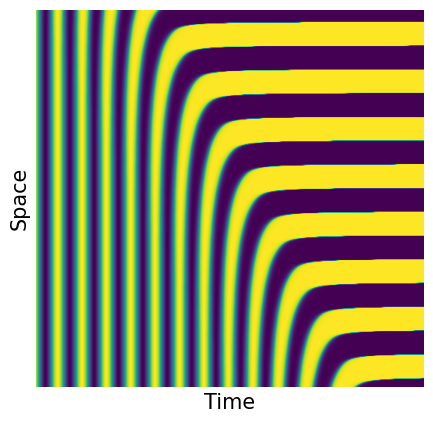

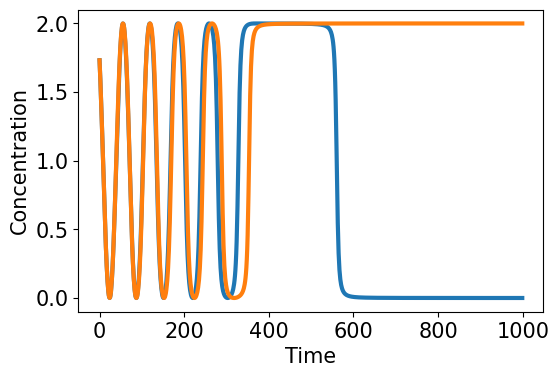

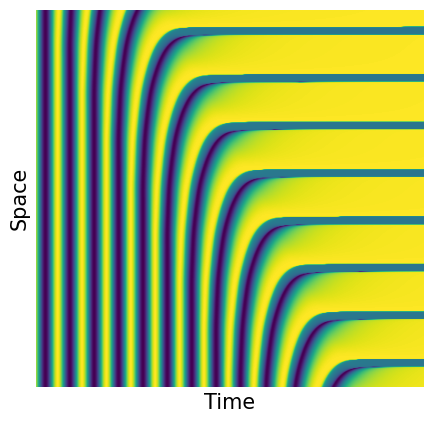

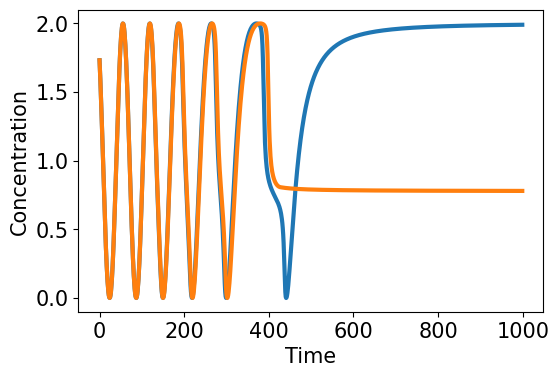

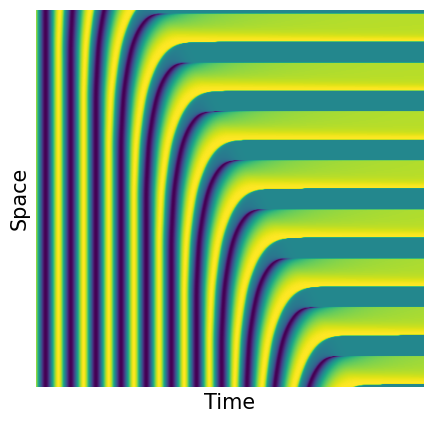

In [46]:
time_param = {
    "init_t" : 0.,
    "total_t" : 100.,
    "dt" : 0.01,
    "n_skr" : 10  # number of Steps modulo which you want to Keep the Results
}

ode_param = {
    "alpha" : 1.0,
    "epsilon" : 0.0,
    "steepness" : 0.003,
    "elongation_speed" : 10.,
    "n_cells" : 500,
  
}


n_cells= ode_param["n_cells"]

genes_names = ['A', 'B', 'C']
genes_colors = ['tab:red', 'tab:blue', 'tab:green']

init_conc = np.zeros((n_cells, 1))
init_conc[:,0] = 0.75    # Initial conditions



results, g_gradient, times_plot = integrate_phase_snic(init_conc, time_param, ode_param)
plot_kymo(1+np.cos(results[:,:,0]).transpose())



fig, ax = plt.subplots()  
ax.plot((1+np.cos(results[:,450,0])))
ax.plot((1+np.cos(results[:,470,0])))
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')




ode_param = {
    "alpha" : 1.75,
    "epsilon" : 0.0,
    "steepness" : 0.003,
    "elongation_speed" : 10.,
    "n_cells" : 500,
  
}



results, g_gradient, times_plot = integrate_phase_snic(init_conc, time_param, ode_param)
plot_kymo(1+np.cos(results[:,:,0]).transpose())




fig, ax = plt.subplots()  
ax.plot((1+np.cos(results[:,400,0])))
ax.plot((1+np.cos(results[:,405,0])))
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')



ode_param = {
    "alpha" : 1.75,
    "epsilon" : 0.15,
    "steepness" : 0.003,
    "elongation_speed" : 10.,
    "n_cells" : 500,
  
}





results, g_gradient, times_plot = integrate_phase_snic(init_conc, time_param, ode_param)
plot_kymo(1+np.cos(results[:,:,0]).transpose())


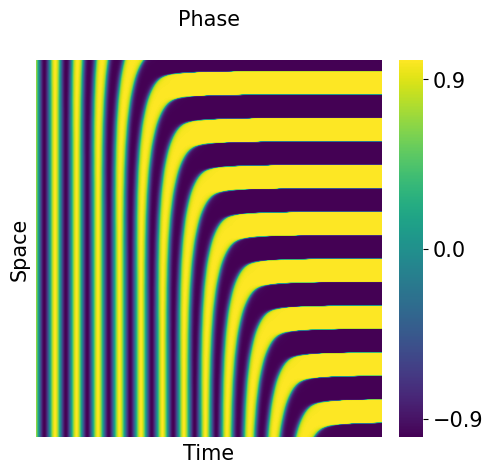

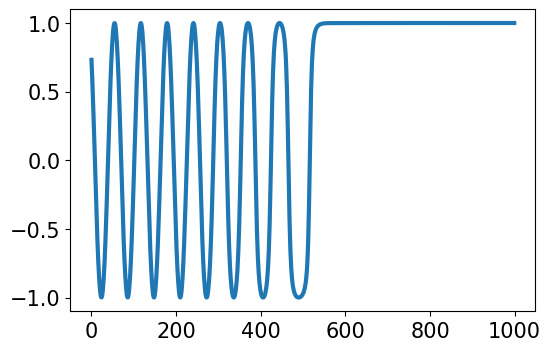

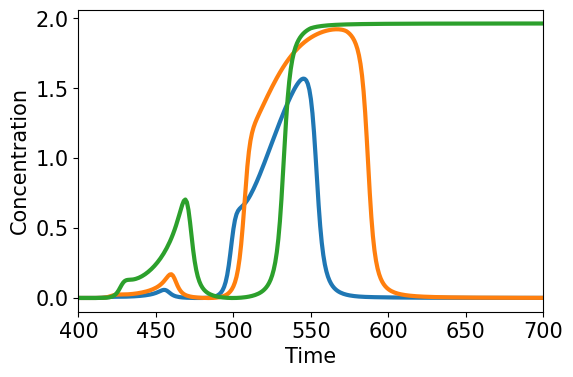

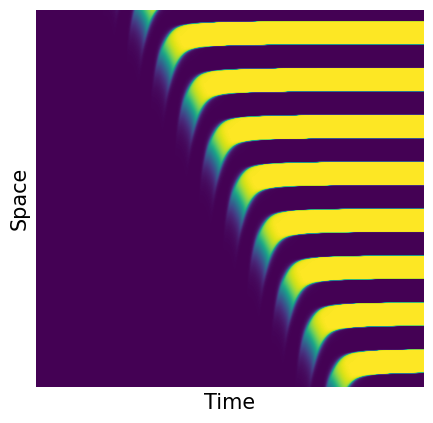

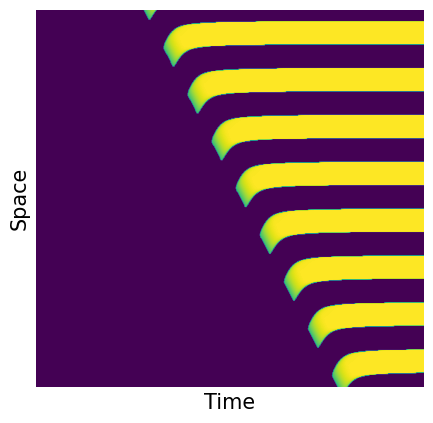

In [15]:


ode_param = {
    "alpha" : 1.0,
    "epsilon" : 0.05,
    "steepness" : 0.003,
    "elongation_speed" : 10.,
    "n_cells" : 500,
  
}


results, g_gradient, times_plot = integrate_phase_snic(init_conc, time_param, ode_param)

oscillations=np.cos(results[:,:,0].transpose())
plot_kymo(oscillations, 'Phase',colorbar=True, cb_ticks=[-0.9, 0., 0.9])
plt.plot(np.cos(results[:,270,0]))
epsilon=ode_param["epsilon"]
window=(1.-g_gradient[:,:].transpose())+epsilon*np.sin(results[:,:,0].transpose())*np.sin(results[:,:,0].transpose())

def hill(x):
    threshold=0.8
    return np.exp(20*(x-threshold))/(np.exp(20*(x-threshold))+1)


Pseudo_Mesp=hill(window)*(oscillations+1)



fig, ax = plt.subplots() 
caud=245
mid=260
ant=283
ax.plot(Pseudo_Mesp[caud,:])
ax.plot(Pseudo_Mesp[mid,:])
ax.plot(Pseudo_Mesp[ant,:])
#ax.plot(Pseudo_Mesp[295,:])
ax.set_xlim([400,700])
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')

#Pseudo_Mesp[caud,:]=0
#Pseudo_Mesp[mid,:]=0
#Pseudo_Mesp[ant,:]=0
plot_kymo(Pseudo_Mesp)

Blocks=Pseudo_Mesp
Blocks[Pseudo_Mesp<1.3]=0.0

plot_kymo(Blocks)


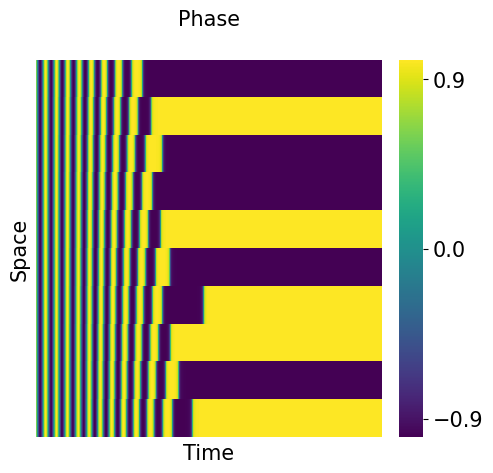

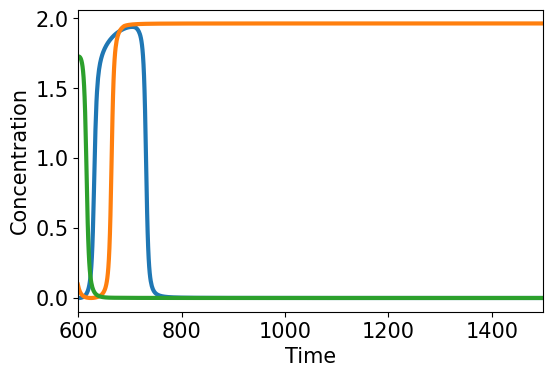

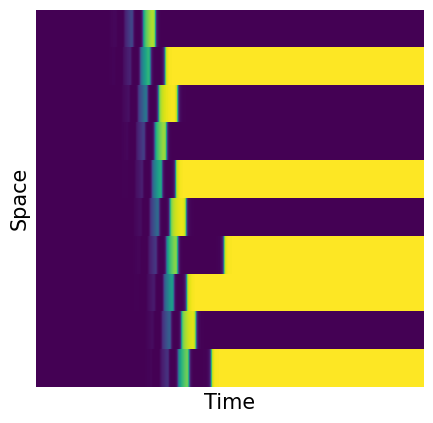

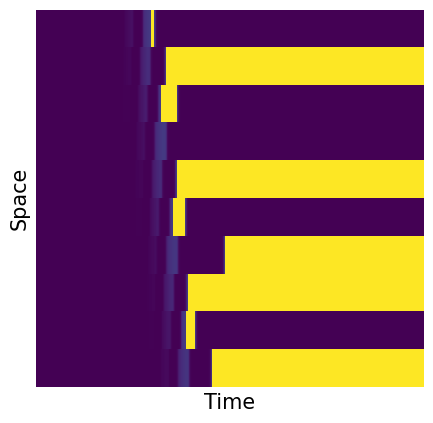

In [16]:
time_param = {
    "init_t" : 0.,
    "total_t" : 200.,
    "dt" : 0.01,
    "n_skr" : 10  # number of Steps modulo which you want to Keep the Results
}

ode_param = {
    "alpha" : 1.0,
    "epsilon" : 0.0,
    "steepness" : 0.03,
    "elongation_speed" : 0.5,
    "n_cells" : 10,
  
}


n_cells= ode_param["n_cells"]

genes_names = ['A', 'B', 'C']
genes_colors = ['tab:red', 'tab:blue', 'tab:green']

init_conc = np.zeros((n_cells, 1))
init_conc[:,0] = 0.75    # Initial conditions


results, g_gradient, times_plot = integrate_phase_snic(init_conc, time_param, ode_param)
oscillations=np.cos(results[:,:,0].transpose())
plot_kymo(oscillations, 'Phase',colorbar=True, cb_ticks=[-0.9, 0., 0.9],interpolation="nearest")
#plt.plot(np.cos(results[:,270,0]))
epsilon=ode_param["epsilon"]
window=(1.-g_gradient[:,:].transpose())+epsilon*np.sin(results[:,:,0].transpose())*np.sin(results[:,:,0].transpose())

def hill(x):
    threshold=0.8
    return np.exp(20*(x-threshold))/(np.exp(20*(x-threshold))+1)


Pseudo_Mesp=hill(window)*(oscillations+1)



fig, ax = plt.subplots() 
caud=7
mid=8
ant=9
ax.plot(Pseudo_Mesp[caud,:])
ax.plot(Pseudo_Mesp[mid,:])
ax.plot(Pseudo_Mesp[ant,:])
#ax.plot(Pseudo_Mesp[295,:])
ax.set_xlim([600,1500])
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')

#Pseudo_Mesp[caud,:]=0
#Pseudo_Mesp[mid,:]=0
#Pseudo_Mesp[ant,:]=0
plot_kymo(Pseudo_Mesp,interpolation="nearest")

Blocks=Pseudo_Mesp
Blocks[Pseudo_Mesp>1.7]=10.0

plot_kymo(Blocks, interpolation="nearest")
